In [9]:
# train_dir = r"D:\git\FYP\Python\TwoStage\data\Dataset1\Pandora7k_split_70_patches\train"
# root_dir =r"D:\git\FYP\Python\TwoStage\data\Dataset1\Pandora7k_split_70_patches"
# train_dir = r"D:\git\FYP\Python\TwoStage\data\Dataset3\Dataset3_Equal_70split_Patches\train"
# root_dir =r"D:\git\FYP\Python\TwoStage\data\Dataset3\Dataset3_Equal_70split_Patches"

# train_dir = r"D:\git\FYP\Python\TwoStage\data\Dataset4\BalancedWikiart_70_split_Patches\train"
# root_dir =r"D:\git\FYP\Python\TwoStage\data\Dataset4\BalancedWikiart_70_split_Patches"

#train_dir = r"D:\git\FYP\Python\TwoStage\data\Dataset5\Dataset5_70_split_Patches\train"
# test_dir = r"D:\git\FYP\Python\TwoStage\data\Dataset5\Dataset5_70_split_Patches\test"
# root_dir =r"D:\git\FYP\Python\TwoStage\data\Dataset5\Dataset5_70_split_Patches"

In [10]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
from torch.utils.data import Dataset, DataLoader
from torchvision import models, transforms, datasets
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_recall_fscore_support, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict, Counter
from PIL import Image


In [11]:
import os
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image

class PatchDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.patches = []

        # Iterate through the image folders in the root directory
        for image_folder in os.listdir(self.root_dir):
            image_folder_path = os.path.join(self.root_dir, image_folder)
            if os.path.isdir(image_folder_path):
                # Inside each image folder, look for patches
                for patch_name in os.listdir(image_folder_path):
                    patch_path = os.path.join(image_folder_path, patch_name)
                    if patch_path.endswith(('.png', '.jpg', '.jpeg')) and not patch_name.endswith('_resized.jpg'):
                        self.patches.append((patch_path, image_folder))  # Save patch path and folder name (image_name)
                        print(f"Adding patch: {patch_path}")

        if len(self.patches) == 0:
            print(f"Warning: No patches found in '{self.root_dir}' directory.")
        else:
            print(f"Total patches found: {len(self.patches)}")

    def __len__(self):
        return len(self.patches)

    def __getitem__(self, idx):
        patch_path, image_folder = self.patches[idx]
        patch = Image.open(patch_path)
        if self.transform:
            patch = self.transform(patch)

        return patch, patch_path  # Return patch and its path (no labels)

# Define transformations
data_transforms = {
    'test': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
}

# Test dataset directory (the root directory where image folders are located)
test_dir = r"D:\git\FYP\Python\TwoStage\data\West_Indian_Patches" # Directory with image folders containing patches
model_path = r"D:\git\FYP\ArtGenreClassification\ArtGenreClassification\final\BaseCase_TransferLearning\Experiments\Case_SGD_momentum_gamma\Dataset1\model_Dataset1_SGD_momentum_gamma.pt"

# Initialize test dataset and DataLoader
test_patches_dataset = PatchDataset(root_dir=test_dir, transform=data_transforms['test'])
test_patches_loader = DataLoader(test_patches_dataset, batch_size=10, shuffle=False)

# Example usage: iterate through the test dataset
for batch_idx, (patches, patch_paths) in enumerate(test_patches_loader):
    print(f"Batch {batch_idx + 1}:")
    for i, (patch, path) in enumerate(zip(patches, patch_paths)):
        print(f"  {i + 1}. Patch Path: {path}")


Adding patch: D:\git\FYP\Python\TwoStage\data\West_Indian_Patches\10_NoName\10_NoName_patch_0.jpg
Adding patch: D:\git\FYP\Python\TwoStage\data\West_Indian_Patches\10_NoName\10_NoName_patch_1.jpg
Adding patch: D:\git\FYP\Python\TwoStage\data\West_Indian_Patches\10_NoName\10_NoName_patch_2.jpg
Adding patch: D:\git\FYP\Python\TwoStage\data\West_Indian_Patches\10_NoName\10_NoName_patch_3.jpg
Adding patch: D:\git\FYP\Python\TwoStage\data\West_Indian_Patches\10_NoName\10_NoName_patch_4.jpg
Adding patch: D:\git\FYP\Python\TwoStage\data\West_Indian_Patches\11_NoName\11_NoName_patch_0.jpg
Adding patch: D:\git\FYP\Python\TwoStage\data\West_Indian_Patches\11_NoName\11_NoName_patch_1.jpg
Adding patch: D:\git\FYP\Python\TwoStage\data\West_Indian_Patches\11_NoName\11_NoName_patch_2.jpg
Adding patch: D:\git\FYP\Python\TwoStage\data\West_Indian_Patches\11_NoName\11_NoName_patch_3.jpg
Adding patch: D:\git\FYP\Python\TwoStage\data\West_Indian_Patches\11_NoName\11_NoName_patch_4.jpg
Adding patch: D:\git

C:\Users\persad\AppData\Local\Temp\ipykernel_37176\1963632530.py:105: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location

Validation results saved to evaluation_results.xlsx


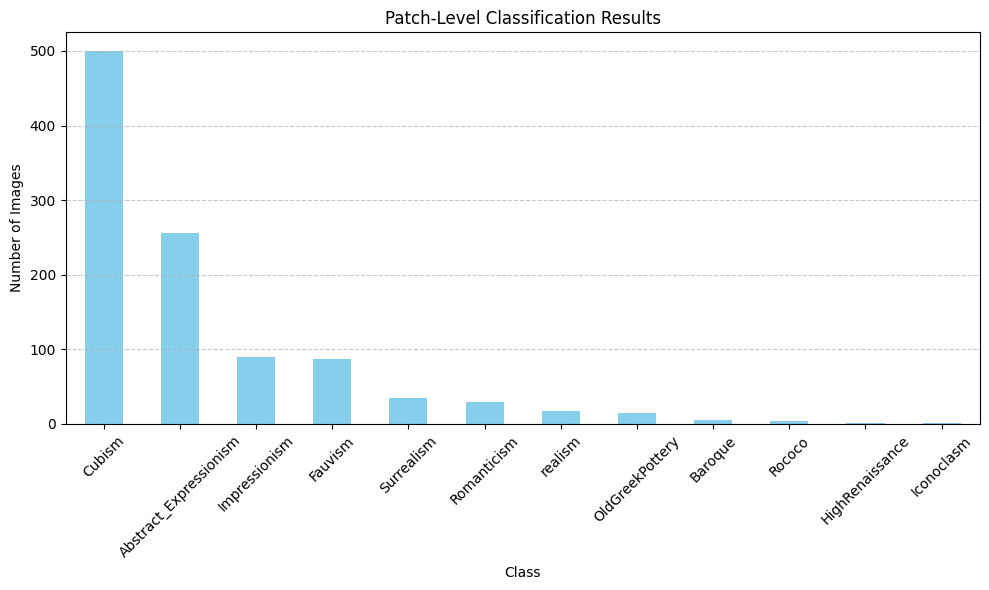

Bar chart saved to results_folder\patch_level_chart.png


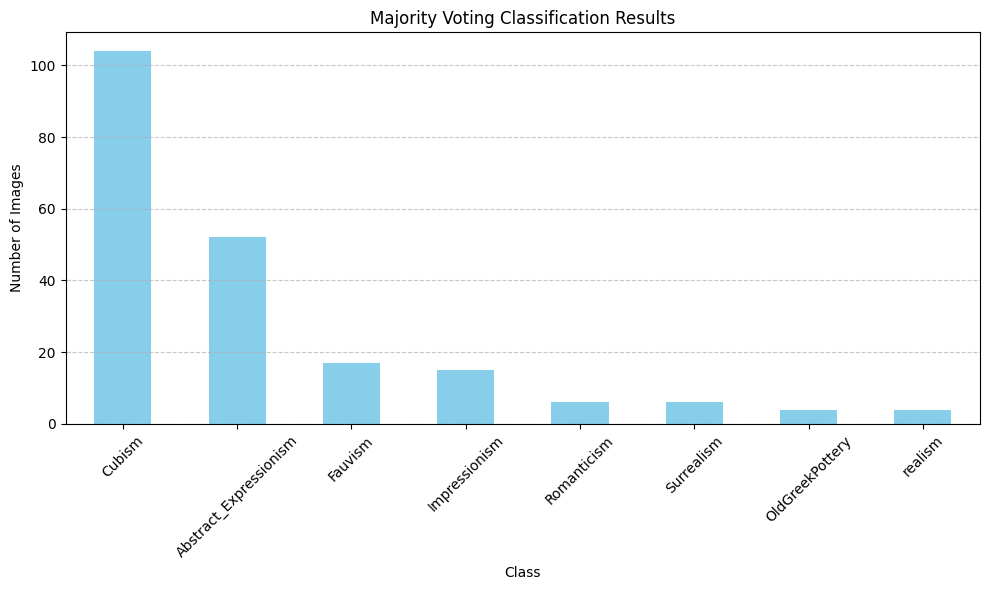

Bar chart saved to results_folder\majority_voting_chart.png


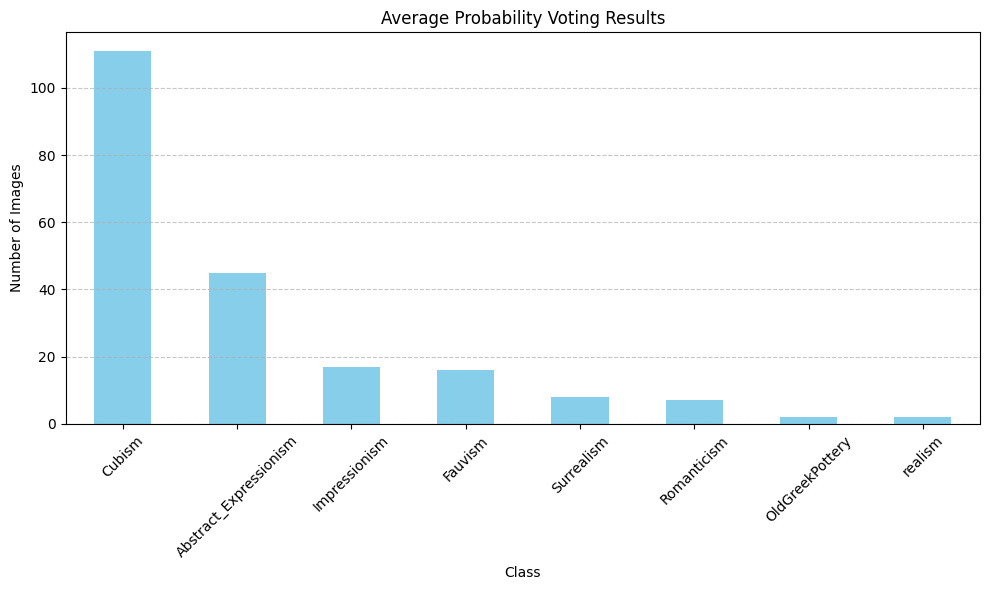

Bar chart saved to results_folder\avg_prob_voting_chart.png


In [12]:
from collections import defaultdict, Counter
import torch
import numpy as np
import pandas as pd
from tqdm import tqdm
from torch import nn
from torchvision import models, transforms, datasets
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import os

import pandas as pd
import matplotlib.pyplot as plt
import os


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Majority Voting based on predicted classes
def majority_voting_unlabeled(patch_results, class_names):
    image_group = defaultdict(list)

    for res in patch_results:
        image_group[res['Image_Folder']].append((res['Predicted_Class'], res['Confidence (%)']))

    majority_results = []

    for img, preds_conf in image_group.items():
        preds = [class_names.index(pred) for pred, conf in preds_conf]
        voted_class_idx = Counter(preds).most_common(1)[0][0]

        prob_tensor = torch.zeros(len(class_names))
        for pred, conf in preds_conf:
            idx = class_names.index(pred)
            prob_tensor[idx] += conf

        top3_probs, top3_indices = torch.topk(prob_tensor, 3)

        majority_results.append({
            "Image_Folder": img,
            "Voted_Class": class_names[voted_class_idx],
            "Top1_Class": class_names[top3_indices[0].item()],
            "Top1_Prob (%)": (top3_probs[0].item() / torch.sum(prob_tensor).item()) * 100 if torch.sum(prob_tensor).item() > 0 else 0,
            "Top2_Class": class_names[top3_indices[1].item()],
            "Top2_Prob (%)": (top3_probs[1].item() / torch.sum(prob_tensor).item()) * 100 if torch.sum(prob_tensor).item() > 0 else 0,
            "Top3_Class": class_names[top3_indices[2].item()],
            "Top3_Prob (%)": (top3_probs[2].item() / torch.sum(prob_tensor).item()) * 100 if torch.sum(prob_tensor).item() > 0 else 0,
        })

    return majority_results

# Softmax-averaged probabilities across patches
def average_probabilities_unlabeled(patch_results, class_names):
    image_group = defaultdict(list)

    for res in patch_results:
        # Assuming softmax_prob is stored directly from model output
        softmax_tensor = torch.tensor(res['Softmax_Vector'])  # Now using the full softmax vector
        image_group[res['Image_Folder']].append(softmax_tensor)

    avg_results = []

    for img, probs in image_group.items():
        avg_probs = torch.mean(torch.stack(probs), dim=0)
        top3_probs, top3_indices = torch.topk(avg_probs, 3)
        predicted_class_idx = torch.argmax(avg_probs).item()

        avg_results.append({
            "Image_Folder": img,
            "Voted_Class": class_names[predicted_class_idx],
            "Top1_Class": class_names[top3_indices[0].item()],
            "Top1_Prob (%)": top3_probs[0].item() * 100,
            "Top2_Class": class_names[top3_indices[1].item()],
            "Top2_Prob (%)": top3_probs[1].item() * 100,
            "Top3_Class": class_names[top3_indices[2].item()],
            "Top3_Prob (%)": top3_probs[2].item() * 100,
        })

    return avg_results

def track_metrics(predictions, labels):
    return {
        "Accuracy": accuracy_score(labels, predictions),
        "Precision": precision_score(labels, predictions, average="weighted", zero_division=0),
        "Recall": recall_score(labels, predictions, average="weighted", zero_division=0),
        "F1-Score": f1_score(labels, predictions, average="weighted", zero_division=0)
    }

def save_validation_results_to_excel(filename, patch_results, majority_results, avg_prob_results):
    with pd.ExcelWriter(filename) as writer:
        pd.DataFrame(patch_results).to_excel(writer, sheet_name="PatchVoting", index=False)
        pd.DataFrame(majority_results).to_excel(writer, sheet_name="MajorityVoting", index=False)
        pd.DataFrame(avg_prob_results).to_excel(writer, sheet_name="AvgProbabilityVoting", index=False)
    print(f"Validation results saved to {filename}")

def initialize_model(num_classes):
    model = models.resnet50(weights='IMAGENET1K_V1')
    num_features = model.fc.in_features
    model.fc = nn.Linear(num_features, num_classes)
    return model.to(device)

def evaluate_model(model_path, dataloader, class_names, filenamePred="evaluation_results.xlsx"):
    model = initialize_model(len(class_names))
    # Try to load as state_dict first, if fails, load as full model
    try:
        model.load_state_dict(torch.load(model_path, map_location=device))
    except TypeError:
        # If it's a full model instead of state_dict
        model = torch.load(model_path, map_location=device)
    model.eval()

    patch_results = []

    with torch.no_grad():
        for patches, labels, patch_paths, image_paths in tqdm(dataloader, desc="Evaluating", unit="batch"):
            patches = patches.to(device)
            outputs = model(patches)

            softmax_outputs = torch.softmax(outputs, dim=1)
            confs, preds = torch.max(softmax_outputs, 1)

            for idx in range(patches.size(0)):
                patch_results.append({
                    "Image_Folder": image_paths[idx],
                    "Patch_Path": patch_paths[idx],
                    "Predicted_Class": class_names[preds[idx].item()],
                    "Confidence (%)": confs[idx].item() * 100,
                    "Softmax_Vector": softmax_outputs[idx].cpu().tolist()  # Store full softmax vector for averaging
                })

    # Voting Methods
    majority_results = majority_voting_unlabeled(patch_results, class_names)
    avg_prob_results = average_probabilities_unlabeled(patch_results, class_names)

    # Save results
    save_validation_results_to_excel(filenamePred, patch_results, majority_results, avg_prob_results)

    return patch_results, majority_results, avg_prob_results



# Define transformations (same as training)
data_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
class_dir = r"D:\git\FYP\Python\TwoStage\data\Dataset1\Pandora7k_split_70\test"
# Load class names correctly from the training dataset
train_dataset = datasets.ImageFolder(class_dir, transform=data_transform)
class_names = train_dataset.classes  # Ensures correct mapping used in training
class_to_idx = train_dataset.class_to_idx  # Mapping of class names to indices

from torch.utils.data import DataLoader

# Ensure test_patches_dataset is properly created
if test_patches_dataset is None:
    raise ValueError("test_patches_dataset is None. Ensure it is properly initialized.")

# Initialize DataLoader
test_patches_loader = DataLoader(test_patches_dataset, batch_size=32, shuffle=False)
# Create PatchDataset class if it doesn't exist
class PatchDataset(torch.utils.data.Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.patch_paths = []
        self.image_paths = []
        
        # Walk through the directory to find all patch files
        for root, _, files in os.walk(root_dir):
            for file in files:
                if file.endswith('.jpg') or file.endswith('.png'):
                    full_path = os.path.join(root, file)
                    image_folder = os.path.basename(os.path.dirname(full_path))
                    self.patch_paths.append(full_path)
                    self.image_paths.append(image_folder)
    
    def __len__(self):
        return len(self.patch_paths)
    
    def __getitem__(self, idx):
        img_path = self.patch_paths[idx]
        image = datasets.folder.default_loader(img_path)
        
        if self.transform:
            image = self.transform(image)
        
        # Since we don't have actual labels for unlabeled data, we'll use dummy labels
        dummy_label = 0  # This is just a placeholder
        
        return image, dummy_label, self.patch_paths[idx], self.image_paths[idx]

# Initialize the dataset with proper transforms
test_patches_dataset = PatchDataset(
    root_dir=test_dir,
    transform=data_transform
)

# Initialize DataLoader
test_patches_loader = torch.utils.data.DataLoader(test_patches_dataset, batch_size=32, shuffle=False)

# Check if DataLoader is valid
if test_patches_loader is None:
    raise ValueError("test_patches_loader is None. DataLoader failed to initialize.")
    raise ValueError("test_patches_loader is None. DataLoader failed to initialize.")

# Create inverse mapping from index to class name
idx_to_class = {v: k for k, v in class_to_idx.items()}
patch_results, majority_results, avg_results = evaluate_model(
    model_path=model_path,
    dataloader=test_patches_loader,
    class_names= class_names,
    filenamePred="evaluation_results.xlsx"
)


# Set your results folder path
results_folder = "results_folder"
os.makedirs(results_folder, exist_ok=True)

# Function to plot and save bar chart
def plot_class_distribution(results, column_name, title, filename):
    df = pd.DataFrame(results)
    class_counts = df[column_name].value_counts()

    plt.figure(figsize=(10, 6))
    class_counts.plot(kind='bar', color='skyblue')
    plt.xlabel("Class")
    plt.ylabel("Number of Images")
    plt.title(title)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Save the plot
    chart_path = os.path.join(results_folder, filename)
    plt.tight_layout()
    plt.savefig(chart_path)
    plt.show()
    print(f"Bar chart saved to {chart_path}")

# Example usage for each set of results:
# 1. Patch-Level Plot (Assuming you want to count patch predictions)
plot_class_distribution(
    patch_results, 
    column_name='Predicted_Class', 
    title='Patch-Level Classification Results', 
    filename='patch_level_chart.png'
)

# 2. Majority Voting Plot
plot_class_distribution(
    majority_results, 
    column_name='Voted_Class', 
    title='Majority Voting Classification Results', 
    filename='majority_voting_chart.png'
)

# 3. Average Probability Voting Plot
plot_class_distribution(
    avg_results, 
    column_name='Voted_Class', 
    title='Average Probability Voting Results', 
    filename='avg_prob_voting_chart.png'
)

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Ensure results_folder exists
results_folder = "results"
os.makedirs(results_folder, exist_ok=True)

# Function to plot combined bar chart
def plot_combined_class_distribution(patch_results, majority_results, avg_results, filename):
    df_patch = pd.DataFrame(patch_results)
    df_majority = pd.DataFrame(majority_results)
    df_avg = pd.DataFrame(avg_results)

    # Get class distributions
    patch_counts = df_patch["Predicted_Class"].value_counts().sort_index()
    majority_counts = df_majority["Voted_Class"].value_counts().sort_index()
    avg_counts = df_avg["Voted_Class"].value_counts().sort_index()

    # Get all unique classes
    all_classes = sorted(set(patch_counts.index) | set(majority_counts.index) | set(avg_counts.index))

    # Align counts with all classes (fill missing ones with 0)
    patch_counts = patch_counts.reindex(all_classes, fill_value=0)
    majority_counts = majority_counts.reindex(all_classes, fill_value=0)
    avg_counts = avg_counts.reindex(all_classes, fill_value=0)

    # Set bar width
    bar_width = 0.25
    x = np.arange(len(all_classes))  # X positions for classes

    # Create the figure
    plt.figure(figsize=(12, 6))

    # Plot each bar group
    plt.bar(x - bar_width, patch_counts, width=bar_width, label="Patch-Level", color="skyblue")
    plt.bar(x, majority_counts, width=bar_width, label="Majority Voting", color="salmon")
    plt.bar(x + bar_width, avg_counts, width=bar_width, label="Avg Probability Voting", color="limegreen")

    # Formatting
    plt.xlabel("Class")
    plt.ylabel("Number of Images")
    plt.title("Comparison of Classification Results")
    plt.xticks(ticks=x, labels=all_classes, rotation=45)
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Save and show plot
    chart_path = os.path.join(results_folder, filename)
    plt.tight_layout()
    plt.savefig(chart_path)
    plt.show()
    print(f"Bar chart saved to {chart_path}")

# # Call the function
# plot_combined_class_distribution(
#     patch_results, 
#     majority_results, 
#     avg_results, 
#     filename="combined_class_distribution.png"
# )



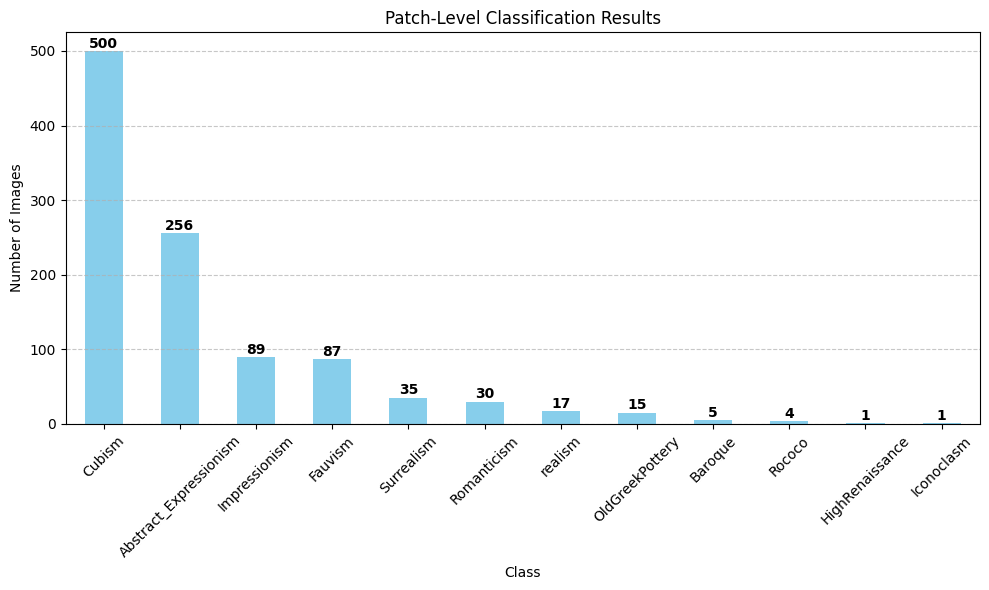

Bar chart saved to results\patch_level_chart.png


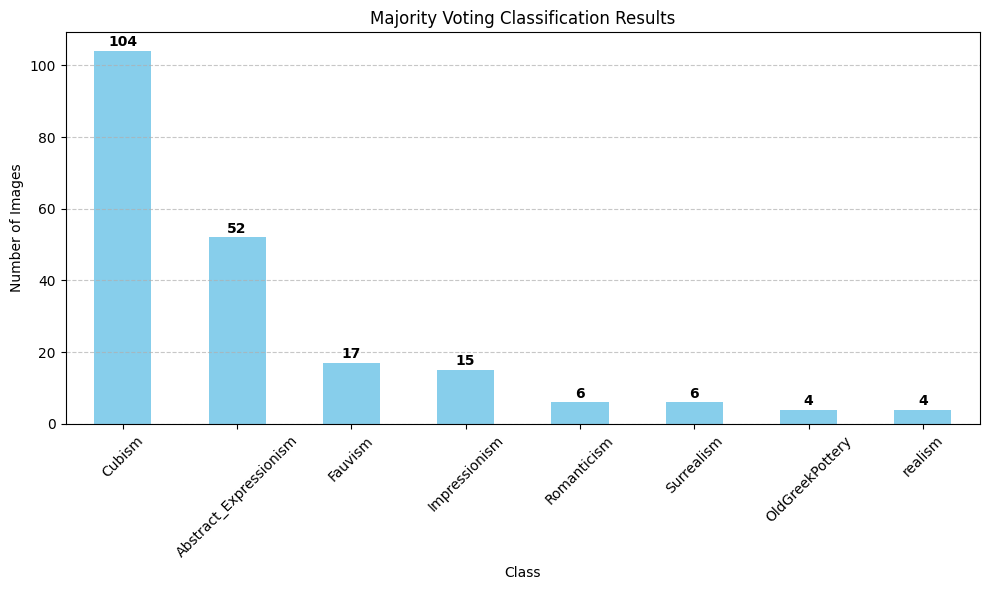

Bar chart saved to results\majority_voting_chart.png


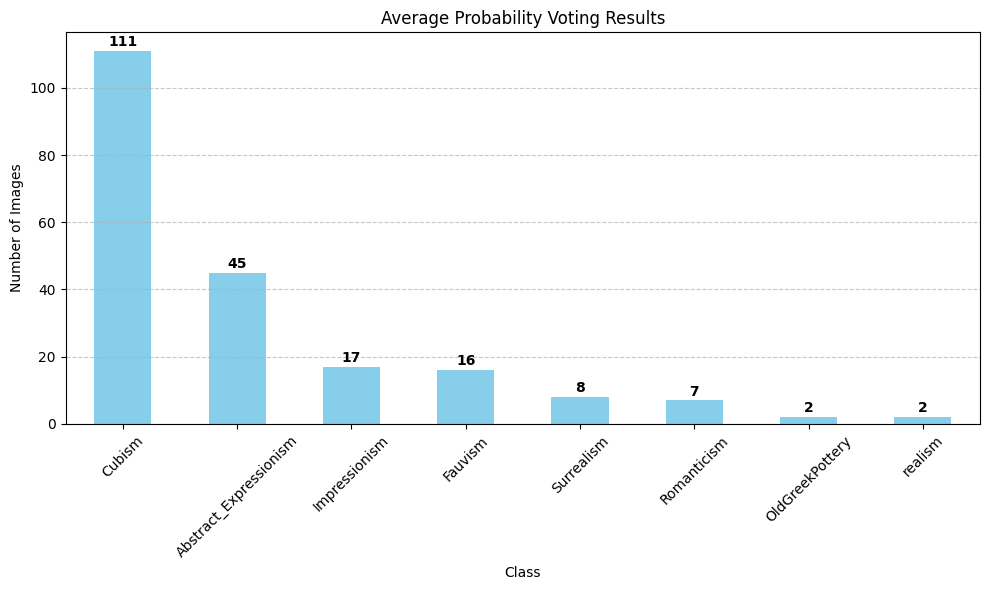

Bar chart saved to results\avg_prob_voting_chart.png


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Ensure results_folder exists
results_folder = "results"
os.makedirs(results_folder, exist_ok=True)

# Function to plot bar chart with numbers on bars and classes sorted by count
def plot_class_distribution(results, column_name, title, filename):
    df = pd.DataFrame(results)
    
    # Ensure all unique classes are included, even if some have zero counts
    all_classes = df[column_name].unique()  # Get all unique classes
    class_counts = df[column_name].value_counts().reindex(all_classes, fill_value=0)
    
    # Sort the classes by count from largest to smallest
    class_counts = class_counts.sort_values(ascending=False)

    plt.figure(figsize=(10, 6))
    bars = class_counts.plot(kind='bar', color='skyblue')

    plt.xlabel("Class")
    plt.ylabel("Number of Images")
    plt.title(title)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Add numbers on bars
    for i, count in enumerate(class_counts):
        plt.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=10, fontweight='bold')

    # Save the plot
    chart_path = os.path.join(results_folder, filename)
    plt.tight_layout()
    plt.savefig(chart_path)
    plt.show()
    print(f"Bar chart saved to {chart_path}")

# Example usage:
plot_class_distribution(patch_results, 'Predicted_Class', 'Patch-Level Classification Results', 'patch_level_chart.png')
plot_class_distribution(majority_results, 'Voted_Class', 'Majority Voting Classification Results', 'majority_voting_chart.png')
plot_class_distribution(avg_results, 'Voted_Class', 'Average Probability Voting Results', 'avg_prob_voting_chart.png')